In [1]:
#loading libraries
#loading libraries
library(phyloseq)
set.seed(10000)
options(repr.plot.width=10, repr.plot.height=10)

In [2]:
library(ggplot2)

In [3]:
mifaser_counts_raw <- as.matrix(read.csv("otu.csv", header=T, sep=",", row.names=1))
dim(mifaser_counts_raw)

[1] 2716  299

subset: elimino i campioni che hanno la polimerasi sotto a 1000 o NA, quelli che hanno meno di 1000 reads e quelli che hanno meno di 0.20 funzioni annotate

In [23]:
print(colnames(mifaser_counts_raw))

  [1] "prt_read_lenght_av" "CR18BCF"            "BQ170218F"         
  [4] "BQ170218S"          "BQ170218"           "BR170218_2F"       
  [7] "BR170218_1"         "BR170218_2S"        "CR18BSF"           
 [10] "CR18CHF"            "CR18CHS"            "CR18CIF"           
 [13] "CR18CIS"            "CR18CLF"            "CR18CVF"           
 [16] "CR18CVS"            "CR18CWF"            "CR18CWS"           
 [19] "CY170214F"          "CY170214S"          "CR18CZF"           
 [22] "EP170215F"          "EP170215S"          "CR18ERF"           
 [25] "CR18ERS"            "ET170220_2"         "FA170219_1"        
 [28] "CR18GES"            "CR18HAF"            "CR18LBF"           
 [31] "CR18LBS"            "CR18LEF"            "CR18LES"           
 [34] "CR18LHF"            "CR18LHS"            "CR18LPF"           
 [37] "CR18LWF"            "CR18LWS"            "CR18MCF"           
 [40] "CR18MCS"            "MT170219"           "PF170222F"         
 [43] "PF170222S"          "CR18PS

In [26]:
otu_sub<-mifaser_counts_raw[,-c(125,123,149,153,151,140:145,154,138,139,134,135,65,77,73,78,175,176,199,177,174,233,234,232,70,68,77,72)]

In [27]:
head(otu_sub)

,prt_read_lenght_av,CR18BCF,BQ170218F,BQ170218S,BQ170218,BR170218_2F,BR170218_1,BR170218_2S,CR18BSF,CR18CHF,⋯,SAMN14653546,SAMN14653547,SAMN14653548,SAMN14653549,SAMN14653552,SAMN14653553,SAMN14653554,SAMN14653555,SAMN14653556,SAMN14653557
1.1.1.1,374.5952,1175,8191,8848,7199,4631,1511,1547,13016,1548,⋯,1967,1125,799,4804,1395,407,491,1088,1960,567
1.1.1.10,253.0000,17,NA,NA,NA,6,9,41,103,39,⋯,40,24,25,9,28,1,5,39,44,7
1.1.1.100,696.4561,6054,4291,5304,3802,10787,11054,13673,26515,9391,⋯,12076,6783,4983,9983,6694,2111,11532,9093,8131,4254
1.1.1.103,339.7500,1660,30,669,36,1607,1962,3418,4539,1516,⋯,2533,1344,1234,390,991,975,356,3007,1561,931
1.1.1.107,248.0000,52,144,136,209,42,104,150,101,130,⋯,77,112,60,27,68,8,19,162,75,34
1.1.1.117,346.5000,15,251,424,206,1,2,NA,1,2,⋯,7,1,1,2,3,1,1,NA,4,NA


In [28]:
env_dataset_raw <- read.csv("env.csv", header=T, sep=",",row.names=2)

In [29]:
mifaser_rpk<-otu_sub[,-1]

In [30]:
# ii. Normalizing the raw reads to the protein lenght - RPK
#aa_seq_lenght <- as.vector(mifaser_counts_raw[,1])
#mifaser_rpk <- mifaser_counts_raw/aa_seq_lenght
#head(mifaser_rpk)

In [31]:
mifaser_rpk

,CR18BCF,BQ170218F,BQ170218S,BQ170218,BR170218_2F,BR170218_1,BR170218_2S,CR18BSF,CR18CHF,CR18CHS,⋯,SAMN14653546,SAMN14653547,SAMN14653548,SAMN14653549,SAMN14653552,SAMN14653553,SAMN14653554,SAMN14653555,SAMN14653556,SAMN14653557
1.1.1.1,1175,8191,8848,7199,4631,1511,1547,13016,1548,1085,⋯,1967,1125,799,4804,1395,407,491,1088,1960,567
1.1.1.10,17,NA,NA,NA,6,9,41,103,39,24,⋯,40,24,25,9,28,1,5,39,44,7
1.1.1.100,6054,4291,5304,3802,10787,11054,13673,26515,9391,7281,⋯,12076,6783,4983,9983,6694,2111,11532,9093,8131,4254
1.1.1.103,1660,30,669,36,1607,1962,3418,4539,1516,1672,⋯,2533,1344,1234,390,991,975,356,3007,1561,931
1.1.1.107,52,144,136,209,42,104,150,101,130,94,⋯,77,112,60,27,68,8,19,162,75,34
1.1.1.117,15,251,424,206,1,2,NA,1,2,4,⋯,7,1,1,2,3,1,1,NA,4,NA
1.1.1.118,72,681,1534,627,330,363,293,1129,154,156,⋯,106,135,87,351,115,52,15,107,107,43
1.1.1.12,7,NA,NA,NA,1,72,14,2,1,4,⋯,1,10,4,2,28,5,NA,16,6,8
1.1.1.125,198,82,71,42,120,232,313,486,411,268,⋯,258,250,259,67,264,46,387,390,259,267
1.1.1.126,8,NA,4,NA,18,8,23,38,22,20,⋯,16,20,12,7,21,6,9,46,38,4


In [32]:
# remove the protein lenght from the two objects. The protein lenght remains stored in the aa_seq_lenght object
mifaser_counts_raw <- mifaser_counts_raw[,-1]
mifaser_rpk <- mifaser_rpk[,-1]

In [33]:

#check the number of NAs present 
sum(is.na(mifaser_rpk))


[1] 272878

In [41]:
#make a sample_data with samples ID  as the first columin and row names
mifaser_name<-data.frame(colnames(mifaser_rpk[1:267,]))
colnames(mifaser_name)<-"sample"
rownames(mifaser_name)<-mifaser_name[,1]

In [42]:
#since too many NAs are present we need to change all the NAs in 0, otherwise all the numbers will be changed in NA
rpk_matrix_noNA<-replace(mifaser_rpk, is.na(mifaser_rpk), 0)


In [43]:
rpk_matrix_noNA

,BQ170218F,BQ170218S,BQ170218,BR170218_2F,BR170218_1,BR170218_2S,CR18BSF,CR18CHF,CR18CHS,CR18CIF,⋯,SAMN14653546,SAMN14653547,SAMN14653548,SAMN14653549,SAMN14653552,SAMN14653553,SAMN14653554,SAMN14653555,SAMN14653556,SAMN14653557
1.1.1.1,8191,8848,7199,4631,1511,1547,13016,1548,1085,16290,⋯,1967,1125,799,4804,1395,407,491,1088,1960,567
1.1.1.10,0,0,0,6,9,41,103,39,24,43,⋯,40,24,25,9,28,1,5,39,44,7
1.1.1.100,4291,5304,3802,10787,11054,13673,26515,9391,7281,31385,⋯,12076,6783,4983,9983,6694,2111,11532,9093,8131,4254
1.1.1.103,30,669,36,1607,1962,3418,4539,1516,1672,1499,⋯,2533,1344,1234,390,991,975,356,3007,1561,931
1.1.1.107,144,136,209,42,104,150,101,130,94,59,⋯,77,112,60,27,68,8,19,162,75,34
1.1.1.117,251,424,206,1,2,0,1,2,4,1,⋯,7,1,1,2,3,1,1,0,4,0
1.1.1.118,681,1534,627,330,363,293,1129,154,156,1302,⋯,106,135,87,351,115,52,15,107,107,43
1.1.1.12,0,0,0,1,72,14,2,1,4,0,⋯,1,10,4,2,28,5,0,16,6,8
1.1.1.125,82,71,42,120,232,313,486,411,268,273,⋯,258,250,259,67,264,46,387,390,259,267
1.1.1.126,0,4,0,18,8,23,38,22,20,44,⋯,16,20,12,7,21,6,9,46,38,4


In [44]:
rpk_ra <- apply(rpk_matrix_noNA, 2, function(x) {x / sum(x)})
head(rpk_ra)


,BQ170218F,BQ170218S,BQ170218,BR170218_2F,BR170218_1,BR170218_2S,CR18BSF,CR18CHF,CR18CHS,CR18CIF,⋯,SAMN14653546,SAMN14653547,SAMN14653548,SAMN14653549,SAMN14653552,SAMN14653553,SAMN14653554,SAMN14653555,SAMN14653556,SAMN14653557
1.1.1.1,0.0072689678,0.0065882353,7.382151e-03,1.800474e-03,6.786509e-04,4.620793e-04,2.340880e-03,6.707911e-04,6.714159e-04,3.134345e-03,⋯,6.095074e-04,7.441618e-04,6.328282e-04,2.691499e-03,1.009186e-03,6.596819e-04,1.795282e-04,4.041347e-04,1.029651e-03,3.606444e-04
1.1.1.10,0.0000000000,0.0000000000,0.000000e+00,2.332723e-06,4.042262e-06,1.224645e-05,1.852417e-05,1.689978e-05,1.485160e-05,8.273593e-06,⋯,1.239466e-05,1.587545e-05,1.980063e-05,5.042359e-06,2.025607e-05,1.620840e-06,1.828190e-06,1.448644e-05,2.311462e-05,4.452399e-06
1.1.1.100,0.0038079771,0.0039493671,3.898727e-03,4.193848e-03,4.964796e-03,4.084040e-03,4.768625e-03,4.069379e-03,4.505603e-03,6.038761e-03,⋯,3.741948e-03,4.486800e-03,3.946662e-03,5.593096e-03,4.842647e-03,3.421593e-03,4.216537e-03,3.377570e-03,4.271477e-03,2.705787e-03
1.1.1.103,0.0000266230,0.0004981385,3.691588e-05,6.247811e-04,8.812132e-04,1.020935e-03,8.163224e-04,6.569246e-04,1.034661e-03,2.884213e-04,⋯,7.848919e-04,8.890253e-04,9.773592e-04,2.185022e-04,7.169200e-04,1.580319e-03,1.301671e-04,1.116942e-03,8.200437e-04,5.921691e-04
1.1.1.107,0.0001277904,0.0001012658,2.143172e-04,1.632906e-05,4.671059e-05,4.480407e-05,1.816448e-05,5.633258e-05,5.816875e-05,1.135214e-05,⋯,2.385972e-05,7.408544e-05,4.752152e-05,1.512708e-05,4.919330e-05,1.296672e-05,6.947121e-06,6.017446e-05,3.939992e-05,2.162594e-05
1.1.1.117,0.0002227458,0.0003157111,2.112409e-04,3.887872e-07,8.982805e-07,0.000000e+00,1.798463e-07,8.666551e-07,2.475266e-06,1.924092e-07,⋯,2.169066e-06,6.614772e-07,7.920253e-07,1.120524e-06,2.170293e-06,1.620840e-06,3.656379e-07,0.000000e+00,2.101329e-06,0.000000e+00


In [45]:
biosam1ple_readcount2 <- env_dataset_raw[, c("Read_count_post_fastp"), drop=F]
biosam1ple_readcount2

,Read_count_post_fastp
,<int>
AO100224_S,5779408
AO190224_F,10325449
BJ190227_F,11176868
BJ190227_S,8409827
GA190226_F,3219530
GA190226_S,9095895
GF1902225_1_S,7725999
GF190226_1_F,12997977
GF190226_2_F,14920350


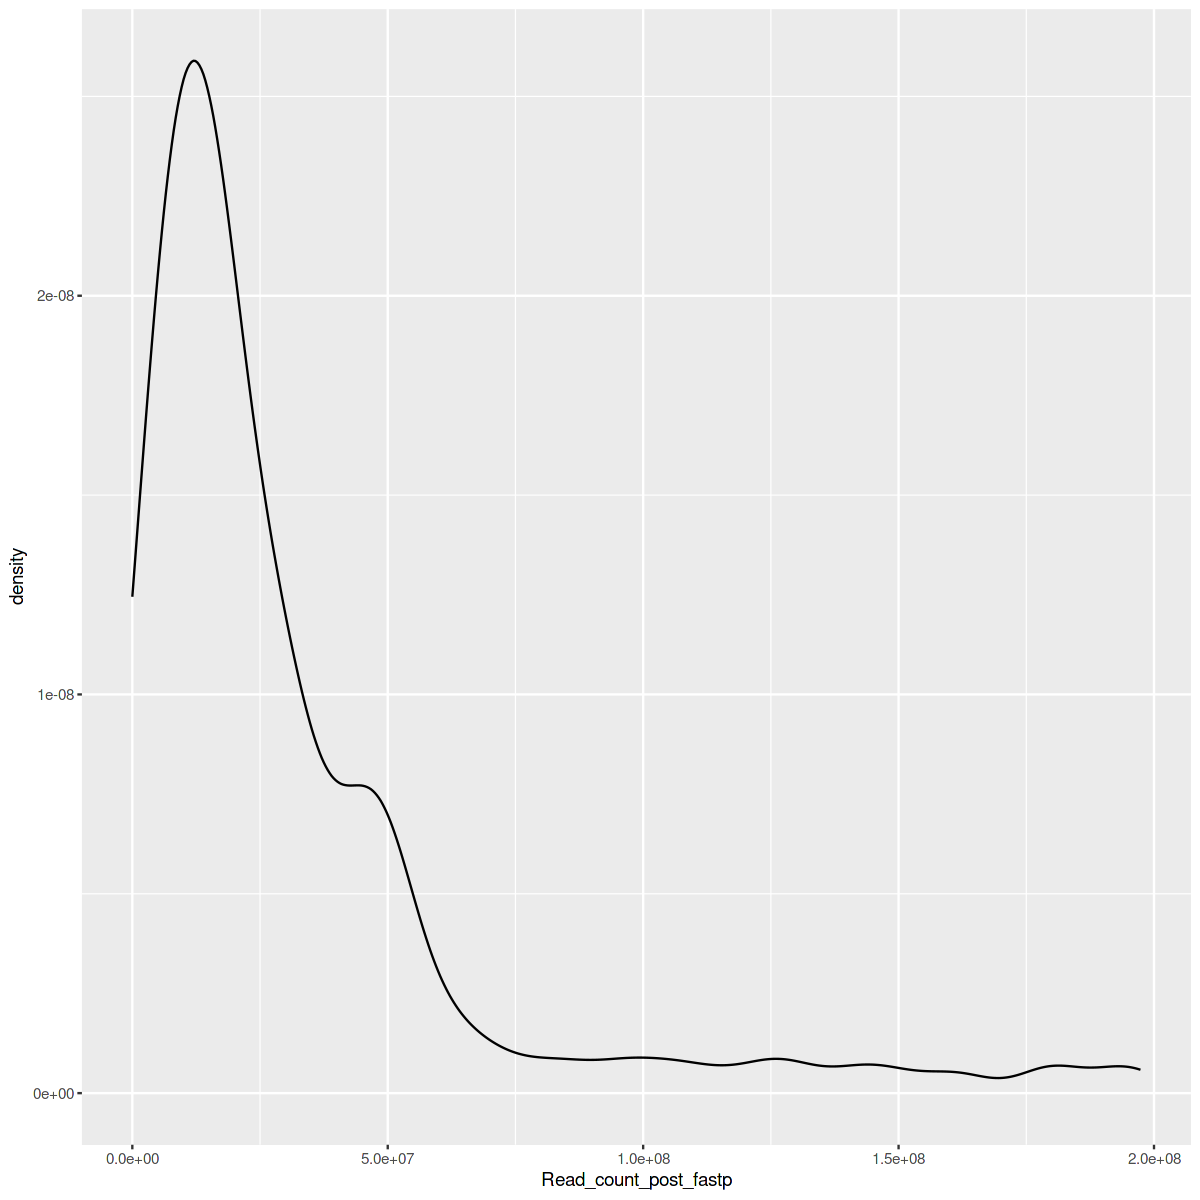

In [46]:
ggplot(biosam1ple_readcount2, aes(x=Read_count_post_fastp))+
geom_density()

In [47]:
median(biosam1ple_readcount2$Read_count_post_fastp)
mean(biosam1ple_readcount2$Read_count_post_fastp)

[1] 18113264

[1] 31493698

In [48]:
# Normalize the RPK counts for the meadian library size (obj3)
# and multiply by the median library size
rpk_median <- rpk_ra*median(biosam1ple_readcount2$Read_count_post_fastp)
rpk_median

,BQ170218F,BQ170218S,BQ170218,BR170218_2F,BR170218_1,BR170218_2S,CR18BSF,CR18CHF,CR18CHS,CR18CIF,⋯,SAMN14653546,SAMN14653547,SAMN14653548,SAMN14653549,SAMN14653552,SAMN14653553,SAMN14653554,SAMN14653555,SAMN14653556,SAMN14653557
1.1.1.1,131664.73607,119334.44847,133714.85673,32612.454915,12292.583733,8369.76507,42400.971805,12150.216229,12161.53337,5.677322e+04,⋯,11040.169631,13479.19956,11462.58420,48751.83285,18279.65523,11948.99322,3251.842219,7320.197883,18650.346914,6532.44652
1.1.1.10,0.00000,0.00000,0.00000,42.253235,73.218566,221.82312,335.533197,306.110099,269.01088,1.498618e+02,⋯,224.507771,287.55626,358.65407,91.33358,366.90347,29.35871,33.114483,262.396799,418.681257,80.64749
1.1.1.100,68974.89714,71535.93068,70618.68111,75964.273627,89928.670142,73975.30564,86375.366274,73709.741992,81611.17460,1.093817e+05,⋯,67778.896014,81270.58722,71486.93000,101309.23133,87716.13769,61976.22772,76375.243319,61178.822935,77370.393242,49010.63054
1.1.1.103,482.22953,9022.91433,668.66715,11316.824670,15961.647442,18492.47383,14786.263908,11899.048968,18741.09105,5.224252e+03,⋯,14216.954588,16103.15041,17703.16509,3957.78826,12985.76224,28624.73805,2357.751181,20231.466025,14853.669149,10726.11590
1.1.1.107,2314.70175,1834.25463,3881.98431,295.772642,846.081210,811.54800,329.017990,1020.366996,1053.62593,2.056243e+02,⋯,432.177459,1341.92920,860.76978,274.00073,891.05129,234.86965,125.835035,1089.955935,713.661234,391.71637
1.1.1.117,4034.65374,5718.55856,3826.26205,7.042206,16.270792,0.00000,3.257604,15.697954,44.83515,3.485158e+00,⋯,39.288860,11.98151,14.34616,20.29635,39.31109,29.35871,6.622897,0.000000,38.061932,0.00000
1.1.1.118,10946.61034,20689.31329,11645.95293,2323.927904,2953.148839,1585.22377,3677.834755,1208.742441,1748.57070,4.537676e+03,⋯,594.945593,1617.50395,1248.11618,3562.00944,1506.92498,1526.65270,99.343449,719.909167,1018.156694,495.40600
1.1.1.12,0.00000,0.00000,0.00000,7.042206,585.748530,75.74448,6.515208,7.848977,44.83515,0.000000e+00,⋯,5.612694,119.81511,57.38465,20.29635,366.90347,146.79353,0.000000,107.649969,57.092899,92.16856
1.1.1.125,1318.09405,957.58882,780.11168,845.064692,1887.411930,1693.43017,1583.195475,3225.929503,3003.95479,9.514481e+02,⋯,1448.075122,2995.37768,3715.65621,679.92773,3459.37561,1350.50046,2563.060975,2623.967991,2464.510128,3076.12561
1.1.1.126,0.00000,53.94867,0.00000,126.759704,65.083170,124.43736,123.788947,172.677492,224.17573,1.533469e+02,⋯,89.803108,239.63021,172.15396,71.03723,275.17761,176.15223,59.606069,309.493661,361.588359,46.08428


In [49]:
# Normalize the RPK amino acid normalized to rpoB (EC 2.7.7.6) mapped reads *1000000 reads (obj4)
rpoB<- as.vector(rpk_median["2.7.7.6",])
mmp_nrpo <- as.matrix(rpk_median/rpoB)*1000000

In [50]:
# Normalize the RPK amino acid normalized to rpoB (EC 2.7.7.6) mapped reads *1000000 reads (obj4)
rpk_median["2.7.7.6",]

BQ170218F     BQ170218S      BQ170218   BR170218_2F    BR170218_1 
 1.015945e+06  8.582828e+05  1.044588e+06  6.178409e+05  5.572990e+05 
  BR170218_2S       CR18BSF       CR18CHF       CR18CHS       CR18CIF 
 5.653839e+05  4.617165e+05  5.781713e+05  6.182879e+05  5.492713e+05 
      CR18CIS       CR18CLF       CR18CVF       CR18CVS       CR18CWF 
 5.549434e+05  5.108134e+05  5.819687e+05  5.179819e+05  4.569375e+05 
      CR18CWS     CY170214F     CY170214S       CR18CZF     EP170215F 
 6.959052e+05  6.207551e+05  5.365532e+05  5.626777e+05  6.094824e+05 
    EP170215S       CR18ERF       CR18ERS    ET170220_2    FA170219_1 
 5.729455e+05  5.462906e+05  5.938758e+05  5.548972e+05  5.635813e+05 
      CR18GES       CR18HAF       CR18LBF       CR18LBS       CR18LEF 
 5.165579e+05  6.139478e+05  5.278416e+05  5.228873e+05  6.262322e+05 
      CR18LES       CR18LHF       CR18LHS       CR18LPF       CR18LWF 
 5.458832e+05  4.673025e+05  4.996799e+05  4.180594e+05  4.528034e+05 
      CR18LWS       CR18MCF       CR18MCS      MT170219     PF170222F 
 6.354493e+05  5.409929e+05  5.179146e+05  6.076378e+05  5.662053e+05 
    PF170222S       CR18PSS       CR18PXS   QH170213_2F   QH170213_2S 
 5.186355e+05  6.291833e+05  5.406698e+05  6.445131e+05  5.696122e+05 
   QH170213_1     QN170220F     QN170220S       CR18RCF       CR18RCS 
 5.144549e+05  5.788502e+05  5.171871e+05  7.837982e+05  4.614689e+05 
      CR18RRF     RS170216F     RS170216S      RV170221       CR18SCF 
 5.495951e+05  5.740525e+05  5.414841e+05  6.177594e+05  5.723768e+05 
      CR18SCS     SI170217F     SI170217S      SL170214       CR18XFF 
 5.910773e+05  5.331790e+05  5.651654e+05  5.369204e+05  5.199960e+05 
      CR18XFS       CR18YRF     ac190614s      bq190717   br1_190716s 
 5.681113e+05  5.462610e+05  5.299888e+05  9.514970e+05  6.014885e+05 
  br2_190717s     gu190718f     gu190718s     lp190617f     sg190719f 
 5.910474e+05  5.603961e+05  5.178769e+05  2.047124e+06  7.154101e+05 
    sg190719s      sl190717     AU200310F     AU200310S     BM200304F 
 5.789399e+05  8.610717e+05  5.641203e+05  5.216690e+05  6.170850e+05 
    BM200304S     CP200307F     CQ200302F     CR200310F     CT200308F 
 4.968184e+05  6.230585e+05  5.697463e+05  8.428838e+05  7.273788e+05 
    EM200307F     EM200307S     GS200305F     PM200308F     PM200308S 
 7.663266e+05  5.959595e+05  5.906375e+05  7.157663e+05  5.793596e+05 
    SP200306F     SP200306S     TF200303F     TF200303S     TP200304F 
 8.580365e+05  5.937694e+05  6.299924e+05  5.365790e+05  6.642676e+05 
   IN190223_S    PG290225_S GF1902225_1_S  GF190226_2_S    LC190226_S 
 6.469300e+05  6.354567e+05  9.520472e+05  1.511180e+06  7.549690e+05 
   BJ190227_S    RF190301_S    PP190301_S    PM190223_S    TM190224_S 
 5.672202e+05  6.467301e+05  6.208450e+05  4.983083e+05  5.634690e+05 
   GA190226_S    AO100224_S    AO190224_F    BJ190227_F    GA190226_F 
 7.022354e+05  5.427138e+05  4.779704e+05  6.526316e+05  7.963867e+05 
 GF190226_1_F  GF190226_2_F    IN022319_F    LC190226_F    PG190225_F 
 8.349092e+05  9.373207e+05  2.569165e+05  8.226776e+05  6.828216e+05 
   PM190223_F    VV190228_F        GN_1_F        GN_2_F        HV_1_F 
 6.350167e+05  5.982932e+05  4.694139e+05  1.501549e+06  1.509729e+06 
       HV_1_S        HV_2_F        HV_2_S        KR_1_F        KR_1_S 
 1.419739e+06  6.581475e+05  6.358047e+05  1.397866e+06  1.520920e+06 
       KR_2_F        KR_2_S     CG211015F     CG211015S     PI210924S 
 1.545021e+06  1.499319e+06  0.000000e+00  0.000000e+00  0.000000e+00 
   SI1210715F    SI1210715S    SI2210715S     SP210924F  SAMD00080625 
 4.439139e+01  3.269942e+02  1.399183e+02  0.000000e+00  5.999926e+05 
 SAMD00080626  SAMD00080627  SAMD00080628  SAMD00155365  SAMD00155369 
 6.056563e+05  5.824429e+05  6.126085e+05  7.032962e+05  2.084731e+06 
 SAMD00155372  SAMN02419148  SAMN02419149  SAMN02419150  SAMN02743532 
 1.213712e+06  7.849301e+05  7.877695e+05  7.558093e+05  8.858788e+05 
 SAMN02786246  SAMN03797534 

In [51]:
rpk_median["2.7.7.6",]

BQ170218F     BQ170218S      BQ170218   BR170218_2F    BR170218_1 
 1.015945e+06  8.582828e+05  1.044588e+06  6.178409e+05  5.572990e+05 
  BR170218_2S       CR18BSF       CR18CHF       CR18CHS       CR18CIF 
 5.653839e+05  4.617165e+05  5.781713e+05  6.182879e+05  5.492713e+05 
      CR18CIS       CR18CLF       CR18CVF       CR18CVS       CR18CWF 
 5.549434e+05  5.108134e+05  5.819687e+05  5.179819e+05  4.569375e+05 
      CR18CWS     CY170214F     CY170214S       CR18CZF     EP170215F 
 6.959052e+05  6.207551e+05  5.365532e+05  5.626777e+05  6.094824e+05 
    EP170215S       CR18ERF       CR18ERS    ET170220_2    FA170219_1 
 5.729455e+05  5.462906e+05  5.938758e+05  5.548972e+05  5.635813e+05 
      CR18GES       CR18HAF       CR18LBF       CR18LBS       CR18LEF 
 5.165579e+05  6.139478e+05  5.278416e+05  5.228873e+05  6.262322e+05 
      CR18LES       CR18LHF       CR18LHS       CR18LPF       CR18LWF 
 5.458832e+05  4.673025e+05  4.996799e+05  4.180594e+05  4.528034e+05 
      CR18LWS       CR18MCF       CR18MCS      MT170219     PF170222F 
 6.354493e+05  5.409929e+05  5.179146e+05  6.076378e+05  5.662053e+05 
    PF170222S       CR18PSS       CR18PXS   QH170213_2F   QH170213_2S 
 5.186355e+05  6.291833e+05  5.406698e+05  6.445131e+05  5.696122e+05 
   QH170213_1     QN170220F     QN170220S       CR18RCF       CR18RCS 
 5.144549e+05  5.788502e+05  5.171871e+05  7.837982e+05  4.614689e+05 
      CR18RRF     RS170216F     RS170216S      RV170221       CR18SCF 
 5.495951e+05  5.740525e+05  5.414841e+05  6.177594e+05  5.723768e+05 
      CR18SCS     SI170217F     SI170217S      SL170214       CR18XFF 
 5.910773e+05  5.331790e+05  5.651654e+05  5.369204e+05  5.199960e+05 
      CR18XFS       CR18YRF     ac190614s      bq190717   br1_190716s 
 5.681113e+05  5.462610e+05  5.299888e+05  9.514970e+05  6.014885e+05 
  br2_190717s     gu190718f     gu190718s     lp190617f     sg190719f 
 5.910474e+05  5.603961e+05  5.178769e+05  2.047124e+06  7.154101e+05 
    sg190719s      sl190717     AU200310F     AU200310S     BM200304F 
 5.789399e+05  8.610717e+05  5.641203e+05  5.216690e+05  6.170850e+05 
    BM200304S     CP200307F     CQ200302F     CR200310F     CT200308F 
 4.968184e+05  6.230585e+05  5.697463e+05  8.428838e+05  7.273788e+05 
    EM200307F     EM200307S     GS200305F     PM200308F     PM200308S 
 7.663266e+05  5.959595e+05  5.906375e+05  7.157663e+05  5.793596e+05 
    SP200306F     SP200306S     TF200303F     TF200303S     TP200304F 
 8.580365e+05  5.937694e+05  6.299924e+05  5.365790e+05  6.642676e+05 
   IN190223_S    PG290225_S GF1902225_1_S  GF190226_2_S    LC190226_S 
 6.469300e+05  6.354567e+05  9.520472e+05  1.511180e+06  7.549690e+05 
   BJ190227_S    RF190301_S    PP190301_S    PM190223_S    TM190224_S 
 5.672202e+05  6.467301e+05  6.208450e+05  4.983083e+05  5.634690e+05 
   GA190226_S    AO100224_S    AO190224_F    BJ190227_F    GA190226_F 
 7.022354e+05  5.427138e+05  4.779704e+05  6.526316e+05  7.963867e+05 
 GF190226_1_F  GF190226_2_F    IN022319_F    LC190226_F    PG190225_F 
 8.349092e+05  9.373207e+05  2.569165e+05  8.226776e+05  6.828216e+05 
   PM190223_F    VV190228_F        GN_1_F        GN_2_F        HV_1_F 
 6.350167e+05  5.982932e+05  4.694139e+05  1.501549e+06  1.509729e+06 
       HV_1_S        HV_2_F        HV_2_S        KR_1_F        KR_1_S 
 1.419739e+06  6.581475e+05  6.358047e+05  1.397866e+06  1.520920e+06 
       KR_2_F        KR_2_S     CG211015F     CG211015S     PI210924S 
 1.545021e+06  1.499319e+06  0.000000e+00  0.000000e+00  0.000000e+00 
   SI1210715F    SI1210715S    SI2210715S     SP210924F  SAMD00080625 
 4.439139e+01  3.269942e+02  1.399183e+02  0.000000e+00  5.999926e+05 
 SAMD00080626  SAMD00080627  SAMD00080628  SAMD00155365  SAMD00155369 
 6.056563e+05  5.824429e+05  6.126085e+05  7.032962e+05  2.084731e+06 
 SAMD00155372  SAMN02419148  SAMN02419149  SAMN02419150  SAMN02743532 
 1.213712e+06  7.849301e+05  7.877695e+05  7.558093e+05  8.858788e+05 
 SAMN02786246  SAMN03797534 

In [52]:
mmp_nrpo

,BQ170218F,BQ170218S,BQ170218,BR170218_2F,BR170218_1,BR170218_2S,CR18BSF,CR18CHF,CR18CHS,CR18CIF,⋯,SAMN14653546,SAMN14653547,SAMN14653548,SAMN14653549,SAMN14653552,SAMN14653553,SAMN14653554,SAMN14653555,SAMN14653556,SAMN14653557
1.1.1.1,129598.27856,223816.83837,2.848549e+05,2.179267e+04,17897.12569,18317.08794,73238.99198,3.715729e+07,19648.84986,9.992856e+04,⋯,19432.19406,25778.40230,19784.92285,74492.66101,18383.30873,18432.75135,6014.46937,1.469010e+04,30953.72954,8211.26639
1.1.1.10,0.00000,0.00000,0.000000e+00,3.813910e+01,103.58313,318.75478,389.66929,2.187777e+06,396.27022,2.411083e+02,⋯,361.20410,459.18474,417.99395,177.86400,303.06414,50.71562,51.37907,4.656810e+02,502.24655,107.82206
1.1.1.100,66030.71226,133233.76484,4.677573e+04,5.858754e+04,174015.14891,119169.87268,153115.14280,Inf,188607.63124,1.989455e+05,⋯,123277.58300,148879.08153,120395.10396,160665.00188,84454.87947,119643.39396,134082.87026,8.712011e+04,134685.67865,71448.11115
1.1.1.103,780.50764,17351.89143,4.709788e+02,2.623414e+04,22555.13354,34465.31559,28344.15124,1.983199e+04,32681.18115,8.230455e+03,⋯,22397.85053,34459.80087,28100.60256,9602.88683,10237.00336,49060.82989,4583.00882,3.727833e+04,18391.57140,15915.00557
1.1.1.107,4153.42848,3228.68885,5.898350e+03,2.772102e+02,2405.21640,1442.29649,533.18097,1.684729e+03,2639.10544,3.775233e+02,⋯,793.47159,2685.57776,1604.18077,652.84003,791.40585,450.42840,217.38792,2.280384e+03,847.40007,578.22284
1.1.1.117,7136.13188,10468.54588,6.017983e+03,1.107095e+01,Inf,0.00000,6.55693,2.695192e+01,109.96671,5.641303e+00,⋯,63.59550,28.65983,21.59696,40.30744,81.51328,50.45162,12.80561,0.000000e+00,27.77289,0.00000
1.1.1.118,23708.51106,39037.26699,8.331235e+03,3.176536e+03,7349.08943,2766.79664,5902.87183,1.973107e+03,4200.83784,7.839159e+03,⋯,1027.81101,3572.19940,1929.29082,6593.79217,3127.93939,2773.90720,126.74620,9.039694e+02,1093.76386,638.93412
1.1.1.12,0.00000,0.00000,0.000000e+00,1.128415e+01,1455.05853,138.65236,11.43528,1.116027e+01,53.83821,0.000000e+00,⋯,10.83376,188.55180,90.30459,38.62901,576.17168,236.65812,0.00000,1.289361e+02,46.70306,118.07162
1.1.1.125,2131.84522,1592.03170,5.049197e+02,1.268826e+03,4334.58987,2851.48852,1878.30811,1.547408e+03,6177.20256,1.694073e+03,⋯,2578.32779,5536.81497,3902.80659,1178.50579,6798.48961,2481.76085,4663.54439,2.799435e+03,3779.86598,3171.07825
1.1.1.126,0.00000,91.27637,0.000000e+00,9.026488e+01,162.97004,224.25300,170.18499,1.422722e+02,428.19494,2.682764e+02,⋯,157.10813,462.68287,113.92024,142.20241,401.50265,236.31351,103.83383,1.204647e+03,537.74591,60.69235


In [53]:
cbind (
mifaser_rpk["2.7.7.6",],
rpk_ra["2.7.7.6",],
rpk_median["2.7.7.6",], 
    mmp_nrpo["2.7.7.6",]
      )

BQ170218F,63203,0.05608846,1015945.1,1745703.9
BQ170218S,63637,0.04738421,858282.8,419262.7
BQ170218,56239,0.05766979,1044588.1,Inf
BR170218_2F,87734,0.03410986,617840.9,1105435.6
BR170218_1,68503,0.03076745,557299.0,651502.6
BR170218_2S,104501,0.03121380,565383.9,920898.9
CR18BSF,141735,0.02549052,461716.5,781725.6
CR18CHF,73662,0.03191978,578171.3,764969.9
CR18CHS,55161,0.03413454,618287.9,491381.9
CR18CIF,157603,0.03032426,549271.3,892863.0
CR18CIS,84019,0.03063740,554943.4,1070006.4


In [177]:
write.csv(mmp_nrpo,"mmp_nrpo.csv")